In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential, Model, load_model
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D, UpSampling2D, Input
from keras.optimizers import Adam
# from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import optimizers
from keras.regularizers import l1
# from keras.utils.vis_utils import plot_model
import librosa, librosa.display
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab
plt.switch_backend('agg')
import xgboost as xgb
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, MaxPool1D, Dropout
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from collections import Counter

In [2]:
df = pd.read_csv('dataset/data_kaggle.csv')
df

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0v8MGxNetjg_,0.519951,0.045853,1612.895795,1411.838677,2907.580566,0.107019,-376.876007,111.017372,-31.904015,...,-7.439712,-1.034580,-0.203084,-3.513495,-1.745704,-3.011878,-2.878482,-2.106427,-4.026825,not_covid
1,1j1duoxdxBg_,0.535472,0.001771,2892.087076,2467.408141,5072.664388,0.148584,-519.158447,60.781284,-13.722884,...,-0.909972,7.216461,-1.719630,3.903021,3.653039,3.043882,2.439958,2.781968,2.195162,not_covid
2,1MSYO4wgiag_,0.496666,0.033657,3429.061935,2788.634413,6886.288452,0.225315,-282.297913,48.581680,-15.522367,...,-6.066336,-4.167640,1.017302,-0.523806,0.538693,-8.855953,-2.927977,-1.118562,-5.906227,not_covid
3,1PajbAKd8Kg_,0.407549,0.013452,2710.811637,2664.287550,5778.474935,0.142076,-346.857300,75.765617,-7.648193,...,5.053118,-0.291308,0.987186,-2.447526,3.692367,2.312328,-2.059656,-4.772599,-0.503851,not_covid
4,cov1,0.412697,0.059004,1555.648634,1418.599932,2870.737092,0.133998,-340.588013,104.156700,-32.228443,...,-8.247169,0.940006,-5.701087,-6.326630,-1.080040,-1.812609,-2.518986,-3.684266,-3.564146,covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,#NAME?,0.492974,0.005093,1600.647469,2300.999728,3660.644531,0.047815,-543.776916,119.100296,23.902969,...,-1.250754,-2.634280,1.647435,0.647164,1.602689,-2.469729,0.704325,-5.352920,-1.281080,not_covid
166,#NAME?,0.400283,0.052132,2664.129566,2563.440387,5518.182373,0.121514,-290.840607,85.514412,-10.986873,...,-4.629812,-7.424622,-4.511141,-7.482200,-4.865530,-6.353733,-5.024187,-8.422812,-0.831208,not_covid
167,#NAME?,0.704281,0.058739,3090.031219,2740.856272,6530.841064,0.179077,-75.595451,68.849228,-11.665833,...,0.677697,-7.535110,0.602187,-6.629556,0.659050,-4.125256,0.734950,-4.655417,-0.645009,not_covid
168,#NAME?,0.424896,0.044159,3173.872023,2482.951387,5768.306478,0.221743,-264.064514,58.729767,-7.446329,...,-0.625627,0.677355,-3.651989,-6.051375,1.211774,-14.923816,-11.180058,-8.861262,-5.078876,not_covid


## Data Cleaning

In [3]:
df = df.drop(columns=['filename'])
df = df.dropna()
df

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.519951,0.045853,1612.895795,1411.838677,2907.580566,0.107019,-376.876007,111.017372,-31.904015,6.622254,...,-7.439712,-1.034580,-0.203084,-3.513495,-1.745704,-3.011878,-2.878482,-2.106427,-4.026825,not_covid
1,0.535472,0.001771,2892.087076,2467.408141,5072.664388,0.148584,-519.158447,60.781284,-13.722884,52.145428,...,-0.909972,7.216461,-1.719630,3.903021,3.653039,3.043882,2.439958,2.781968,2.195162,not_covid
2,0.496666,0.033657,3429.061935,2788.634413,6886.288452,0.225315,-282.297913,48.581680,-15.522367,12.710723,...,-6.066336,-4.167640,1.017302,-0.523806,0.538693,-8.855953,-2.927977,-1.118562,-5.906227,not_covid
3,0.407549,0.013452,2710.811637,2664.287550,5778.474935,0.142076,-346.857300,75.765617,-7.648193,11.362122,...,5.053118,-0.291308,0.987186,-2.447526,3.692367,2.312328,-2.059656,-4.772599,-0.503851,not_covid
4,0.412697,0.059004,1555.648634,1418.599932,2870.737092,0.133998,-340.588013,104.156700,-32.228443,-13.615362,...,-8.247169,0.940006,-5.701087,-6.326630,-1.080040,-1.812609,-2.518986,-3.684266,-3.564146,covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.492974,0.005093,1600.647469,2300.999728,3660.644531,0.047815,-543.776916,119.100296,23.902969,23.709490,...,-1.250754,-2.634280,1.647435,0.647164,1.602689,-2.469729,0.704325,-5.352920,-1.281080,not_covid
166,0.400283,0.052132,2664.129566,2563.440387,5518.182373,0.121514,-290.840607,85.514412,-10.986873,10.970556,...,-4.629812,-7.424622,-4.511141,-7.482200,-4.865530,-6.353733,-5.024187,-8.422812,-0.831208,not_covid
167,0.704281,0.058739,3090.031219,2740.856272,6530.841064,0.179077,-75.595451,68.849228,-11.665833,17.189640,...,0.677697,-7.535110,0.602187,-6.629556,0.659050,-4.125256,0.734950,-4.655417,-0.645009,not_covid
168,0.424896,0.044159,3173.872023,2482.951387,5768.306478,0.221743,-264.064514,58.729767,-7.446329,15.075655,...,-0.625627,0.677355,-3.651989,-6.051375,1.211774,-14.923816,-11.180058,-8.861262,-5.078876,not_covid


## EDA

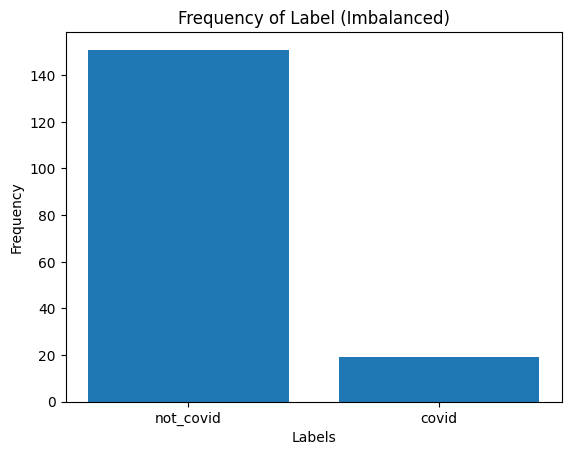

In [4]:
# Label

label_counter = Counter(df['label'])

plt.title('Frequency of Label (Imbalanced)')
plt.bar(label_counter.keys(), label_counter.values())
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()

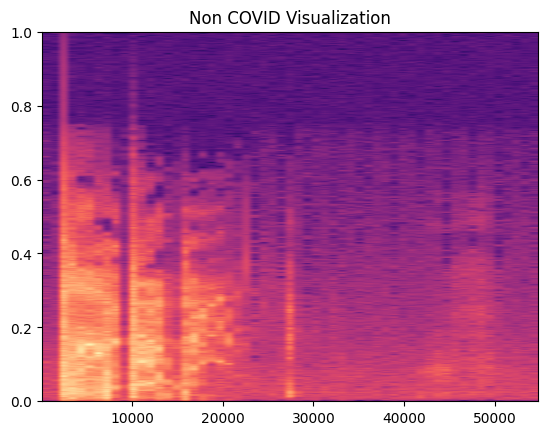

In [5]:
# Wave Visualization

audio_sample_path = 'dataset/data_kaggle/0v8MGxNetjg_ 10.000_ 20.000.wav'
y,sr = librosa.load(audio_sample_path, mono=True, duration=5)
plt.title("Non COVID Visualization")
plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='magma', sides='default', mode='default', scale='dB')
plt.show()

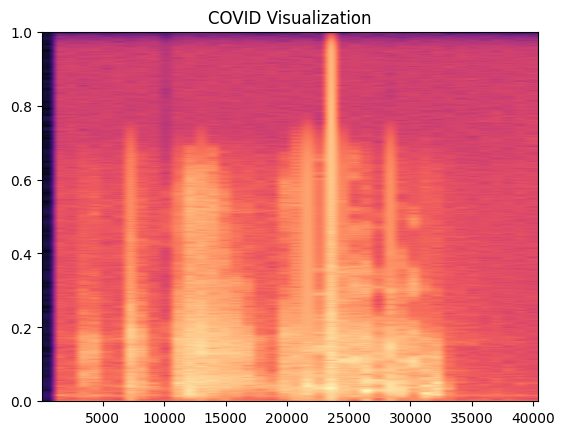

In [6]:
# Wave Visualization

audio_sample_path = 'dataset/data_kaggle/cov1.wav'
y,sr = librosa.load(audio_sample_path, mono=True, duration=5)
plt.title("COVID Visualization")
plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='magma', sides='default', mode='default', scale='dB')
plt.show()

## Pre-Processing

In [7]:
df['label'].value_counts()

label
not_covid    151
covid         19
Name: count, dtype: int64

In [8]:
for i in range(0,len(df.iloc[:,-1])):
   if df.iloc[i ,-1] == 'not_covid':
       df.iloc[i ,-1] = '0'
   else:
       df.iloc[i ,-1] = '1'
df.head(6)

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.519951,0.045853,1612.895795,1411.838677,2907.580566,0.107019,-376.876007,111.017372,-31.904015,6.622254,...,-7.439712,-1.034580,-0.203084,-3.513495,-1.745704,-3.011878,-2.878482,-2.106427,-4.026825,0
1,0.535472,0.001771,2892.087076,2467.408141,5072.664388,0.148584,-519.158447,60.781284,-13.722884,52.145428,...,-0.909972,7.216461,-1.719630,3.903021,3.653039,3.043882,2.439958,2.781968,2.195162,0
2,0.496666,0.033657,3429.061935,2788.634413,6886.288452,0.225315,-282.297913,48.581680,-15.522367,12.710723,...,-6.066336,-4.167640,1.017302,-0.523806,0.538693,-8.855953,-2.927977,-1.118562,-5.906227,0
3,0.407549,0.013452,2710.811637,2664.287550,5778.474935,0.142076,-346.857300,75.765617,-7.648193,11.362122,...,5.053118,-0.291308,0.987186,-2.447526,3.692367,2.312328,-2.059656,-4.772599,-0.503851,0
4,0.412697,0.059004,1555.648634,1418.599932,2870.737092,0.133998,-340.588013,104.156700,-32.228443,-13.615362,...,-8.247169,0.940006,-5.701087,-6.326630,-1.080040,-1.812609,-2.518986,-3.684266,-3.564146,1
5,0.411223,0.062716,2583.166934,2139.571025,4960.213216,0.195428,-341.669006,48.315159,-20.567410,18.050304,...,-13.203741,-4.272643,-12.161370,-5.901212,-9.495269,-5.752600,-12.553079,-14.743461,-5.856839,1


In [9]:
X = np.array(df.iloc[:, :-1])
Y = np.array(df.iloc[:, -1])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## SMOTE

In [12]:
from multi_imbalance.resampling.mdo import MDO

mdo = MDO()
X_train, y_train = mdo.fit_resample(X_train, y_train)

## Modeling

In [13]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

## XGBoost

In [14]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.001],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.1, 0.5, 1.0]
}

In [18]:
# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [19]:
# import XGBClassifier
from xgboost import XGBClassifier

params = {'max_depth': 3,   # max depth of a tree
            'n_estimators': 300,
            'max_depth': 3,
            'learning_rate': 0.01,
            'subsample': 1,
            'colsample_bytree': 0.6,
            'gamma': 0.2,
            'reg_alpha': 0.1,
            'reg_lambda': 0.1,
            'objective': 'multi:softmax',
            'num_class': 2,     # number of classes to classify in the dataset
            'use_label_encoder':False,
            'random_state': 42,
            'verbosity':2,  #0: silent --> 3: very verbose
        }
xgb_clf = XGBClassifier(**params)

# # fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)

In [20]:
y_pred = xgb_clf.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0]


In [21]:
# check accuracy score
from sklearn.metrics import accuracy_score, classification_report

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

XGBoost model accuracy score: 0.9302
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        37
           1       0.71      0.83      0.77         6

    accuracy                           0.93        43
   macro avg       0.84      0.89      0.86        43
weighted avg       0.94      0.93      0.93        43



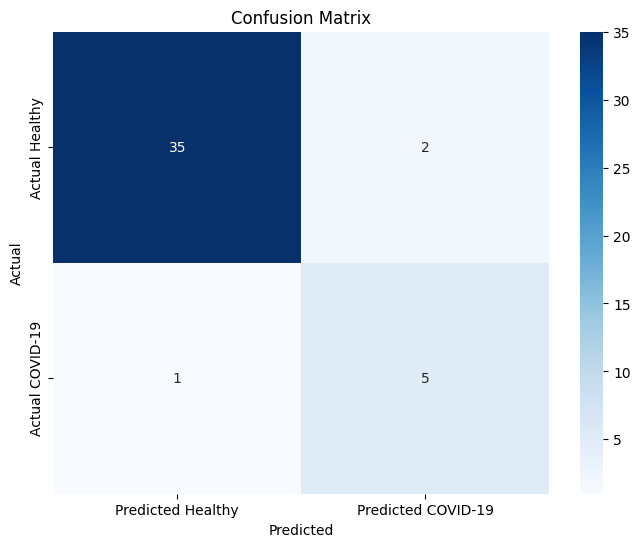

In [22]:
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Healthy', 'Predicted COVID-19'], yticklabels=['Actual Healthy', 'Actual COVID-19'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Random Forest

In [23]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [24]:
grid_search = GridSearchCV(RandomForestClassifier(), cv=3,
						param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

In [25]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42, criterion='entropy', max_depth=9, max_features='log2', max_leaf_nodes=9, n_estimators=25)
clf.fit(X_train, y_train)

# Predict the Test set results
y_pred = clf.predict(X_test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Model accuracy score: 0.8837
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        37
           1       0.57      0.67      0.62         6

    accuracy                           0.88        43
   macro avg       0.76      0.79      0.77        43
weighted avg       0.89      0.88      0.89        43



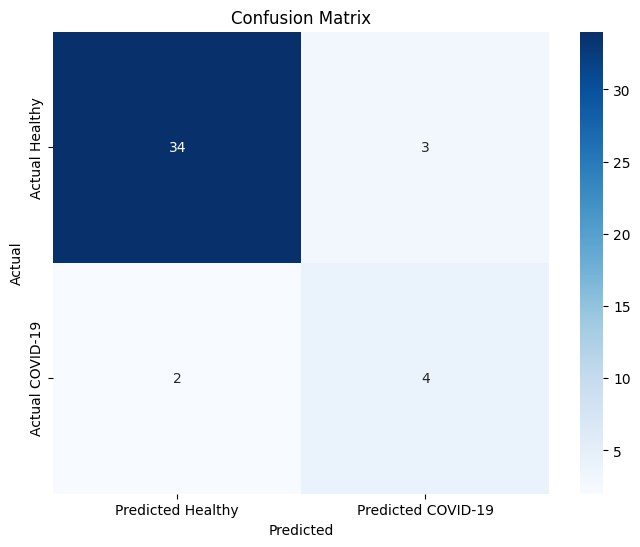

In [26]:
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Healthy', 'Predicted COVID-19'], yticklabels=['Actual Healthy', 'Actual COVID-19'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## ANN / DNN

In [27]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [28]:
# Construct model

model = Sequential([
    Dense(64, input_shape=(26,), activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stopping])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4455 - loss: 0.7746 - val_accuracy: 0.6304 - val_loss: 0.6440
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4785 - loss: 0.7006 - val_accuracy: 0.6304 - val_loss: 0.6656
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5631 - loss: 0.6767 - val_accuracy: 0.6304 - val_loss: 0.6816
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6042 - loss: 0.6579 - val_accuracy: 0.6304 - val_loss: 0.6839
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7028 - loss: 0.6117 - val_accuracy: 0.5652 - val_loss: 0.6838
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6941 - loss: 0.6122 - val_accuracy: 0.5652 - val_loss: 0.6773
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6834 - loss: 0.6120 - val_accuracy: 0.6957 - val_loss: 0.6586
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7294 - loss: 0.5693 - val_accuracy: 0.6522 - val_loss: 0.6486

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Accuracy:               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        37
         1.0       0.71      0.83      0.77         6

    accuracy                           0.93        43
   macro avg       0.84      0.89      0.86        43
weighted avg       0.94      0.93      0.93        43



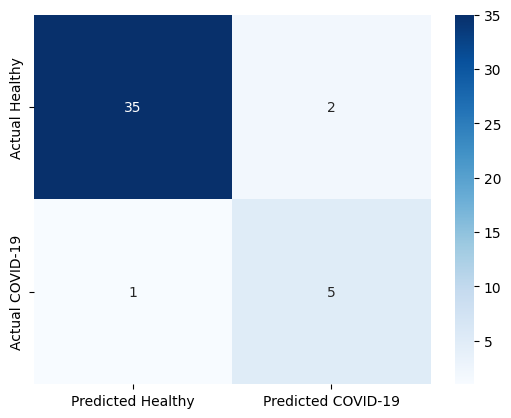

In [29]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(f"Accuracy: {classification_report(y_test, y_pred)}")

# Display the confusion matrix
disp = confusion_matrix(y_test, y_pred)
sns.heatmap(disp, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Healthy', 'Predicted COVID-19'], yticklabels=['Actual Healthy', 'Actual COVID-19'])
plt.show()

# CNN - 1D

In [30]:
print(X_train.shape, y_train.shape)

(228, 26) (228,)


In [31]:
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

y_train_reshaped = np.expand_dims(y_train, axis=-1)
y_test_reshaped = np.expand_dims(y_test, axis=-1)

In [32]:
print(X_train_reshaped.shape, y_train_reshaped.shape)

(228, 26, 1) (228, 1)


In [38]:
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(26, 1)),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Dropout(0.3),
    
    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Early stopping to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32,
                    callbacks = [early_stopping])

# Evaluate the model


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 24, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 24, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 10, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 10, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,097 (453.50 KB)

 Trainable params: 115,713 (452.00 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.5569 - loss: 1.0709 - val_accuracy: 0.7391 - val_loss: 0.6671
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7084 - loss: 0.7403 - val_accuracy: 0.8478 - val_loss: 0.6560
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7002 - loss: 0.7434 - val_accuracy: 0.9130 - val_loss: 0.6080
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8312 - loss: 0.3802 - val_accuracy: 0.9348 - val_loss: 0.5850
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7478 - loss: 0.5428 - val_accuracy: 0.9348 - val_loss: 0.5784
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8198 - loss: 0.4262 - val_accuracy: 0.9130 - val_loss: 0.5823
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8305 - loss: 0.3816 - val_accuracy: 0.8696 - val_loss: 0.5913
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8416 - loss: 0.4377 - val_accuracy: 0.8478 - val_loss:

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000029790146C00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Accuracy:               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        37
         1.0       0.80      0.67      0.73         6

    accuracy             

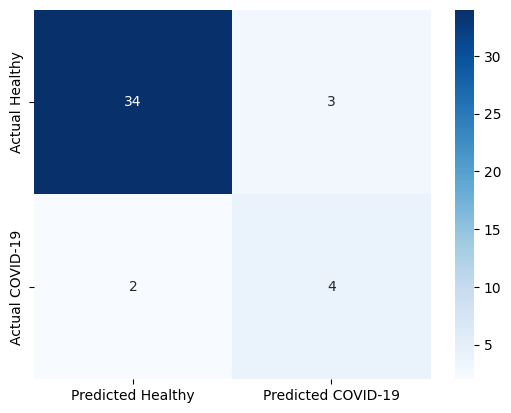

In [39]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(f"Accuracy: {classification_report(y_test, y_pred)}")

# Display the confusion matrix
disp = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Healthy', 'Predicted COVID-19'], yticklabels=['Actual Healthy', 'Actual COVID-19'])
plt.show()